In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [24]:
shap.initjs()

In [2]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
url = 'https://github.com/esnt/Data/raw/main/Fires/utah_fires.csv'
#df = pd.read_csv('../../../Data/Fires/utah_fires.csv')
df = pd.read_csv(url)
df['FIRE_SIZE'] = np.log1p(df['FIRE_SIZE'])

In [4]:
df = df.sample(5000,random_state=100).reset_index(drop=True)

In [5]:
#df.describe()

In [6]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,LATITUDE,LONGITUDE,FIRE_SIZE,NWCG_CAUSE_CLASSIFICATION
0,1999,231,1800.0,37.316600,-112.850800,0.262364,Natural
1,2013,249,1626.0,37.340000,-113.247200,0.095310,Natural
2,2005,234,2348.0,41.806667,-111.511667,0.095310,Natural
3,2009,245,1410.0,40.423480,-112.322980,0.095310,Human
4,1998,237,2215.0,39.335000,-112.356667,0.095310,Natural


In [8]:
df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

NWCG_CAUSE_CLASSIFICATION
Natural    3123
Human      1877
Name: count, dtype: int64

In [9]:
X = df.drop('NWCG_CAUSE_CLASSIFICATION',axis=1)
features = X.columns
y = (df['NWCG_CAUSE_CLASSIFICATION']=='Human').astype(int)

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [11]:
np.mean(ytest)

0.36

In [12]:
imputer = KNNImputer(n_neighbors=5)
Xtrain = imputer.fit_transform(Xtrain)
Xtest = imputer.transform(Xtest)

In [13]:
model = RandomForestClassifier(max_depth=8)
model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=8)

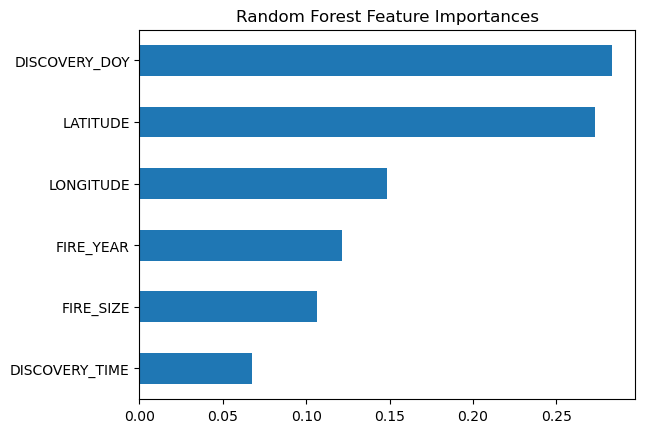

In [14]:
pd.Series(model.feature_importances_, index=features).sort_values().plot.barh()
plt.title('Random Forest Feature Importances');

### Looking at SHAP

In [15]:
## The explainer object computes the SHAP values of the model

explainer = shap.TreeExplainer(model)
explainer.feature_names = features
sv = explainer(Xtest)



In [16]:
sv.shape

## The shape is (n_samples, n_features, n_classes)

(1250, 6, 2)

In [17]:
## The Explanation object stores and structures the SHAP values for easy interpretation
## It is kind of a data container with the SHAP values, base values (average prediction), and the input data

# the [:,:,1] gets the SHAP values for the positive class
exp = shap.Explanation(sv[:,:,1], sv.base_values[:,1], Xtest, feature_names=features)


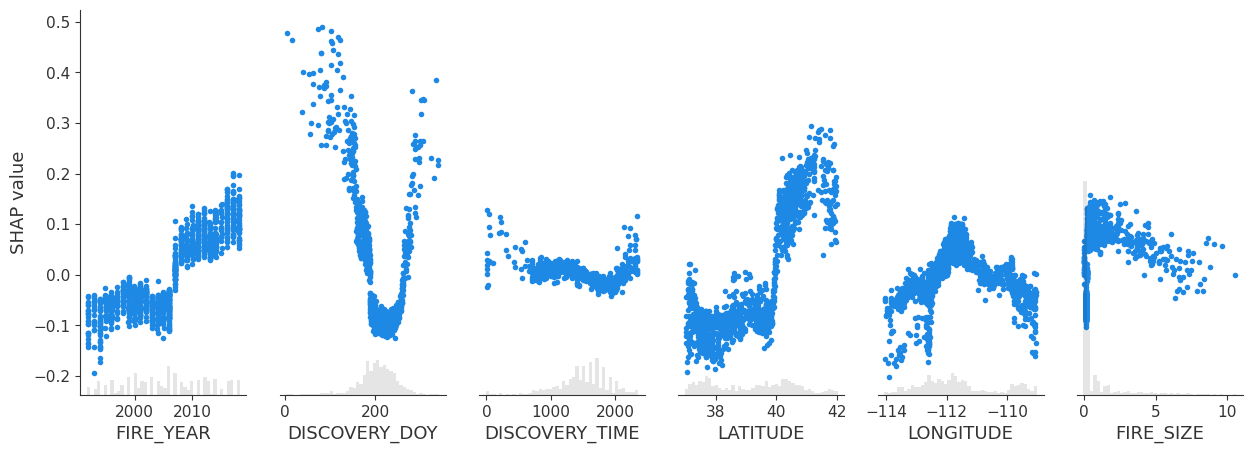

In [18]:
shap.plots.scatter(exp)

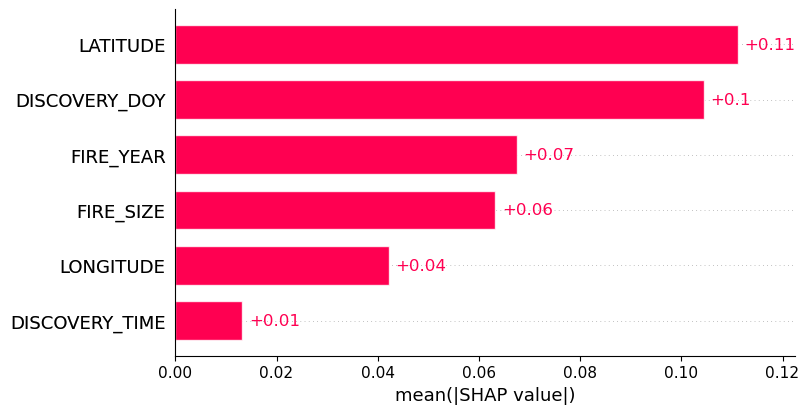

In [19]:
shap.plots.bar(exp)

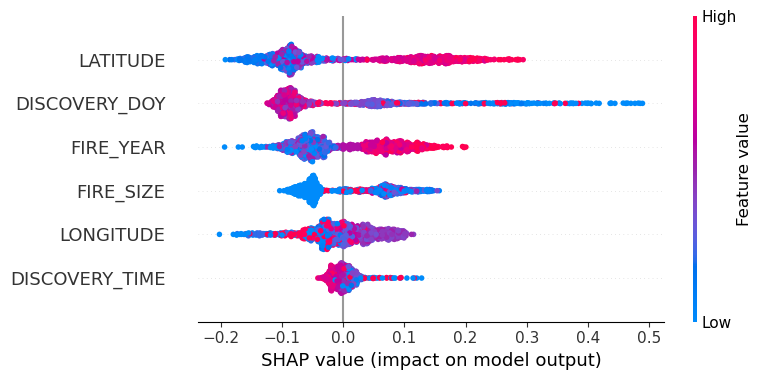

In [20]:
shap.summary_plot(sv[:,:,1], Xtest, feature_names=features)

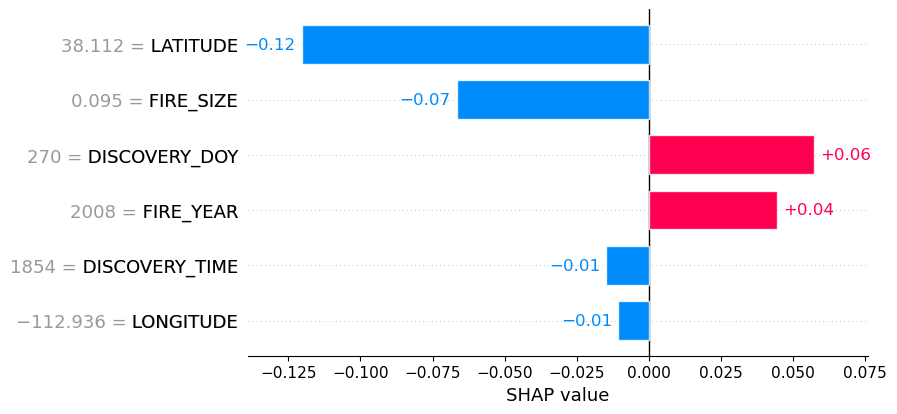

In [21]:
idx = 11
shap.plots.bar(exp[idx], show_data=True)

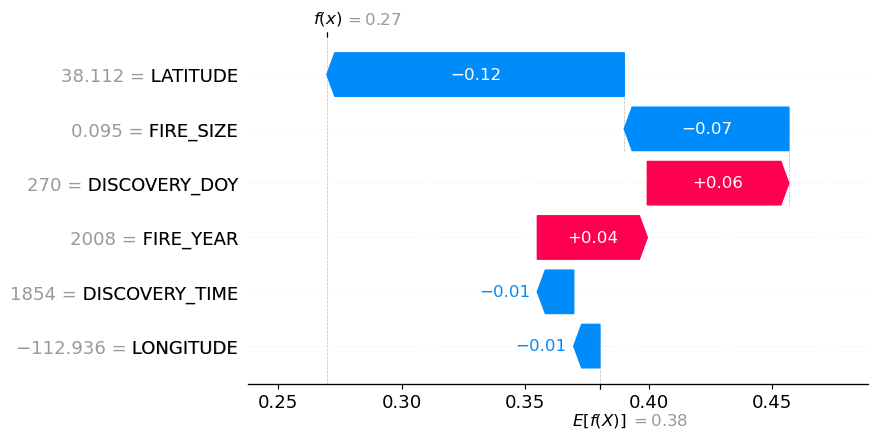

In [22]:

shap.plots.waterfall(exp[idx])

In [25]:
shap.plots.force(exp[idx])


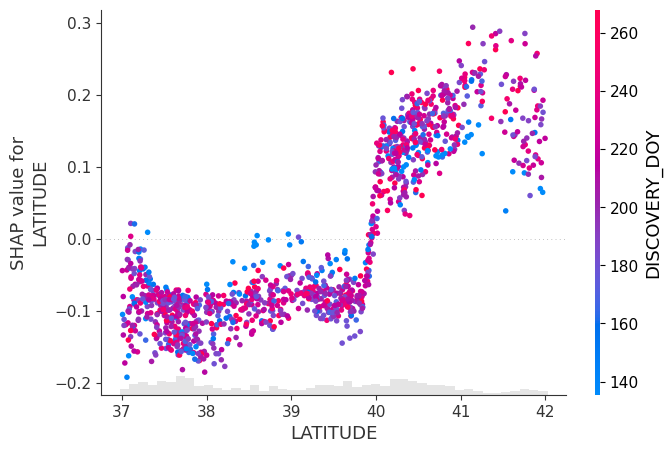

In [31]:
shap.plots.scatter(exp[:,'LATITUDE'], color=exp[:, 'DISCOVERY_DOY'])